

<h1>The segment below is related to the Baryonic Acoustic Oscillations. I wanted to see how my theory would deal with that. This is work in progress</h1>

<br>
<br>

Current Density is related to the speed of light by Energy Conservation:

$$ \rho=\frac{c^2}{0.776 *G *2 \pi^2R_0^2} $$

# Calculation of the energy available for the Many-Bangs

$$ volume(n, \phi) = \frac{ 2*\pi^{(\frac{n-1}{2})}*\int_{0}^{\pi}{sin(x)^{(n - 2)}dx}}{\Gamma(\frac{n-1}{2})}R^3 $$

#  I will consider the volume of the Visible Universe only (1 radian as opposed to pi radians)

$$ \frac{{P\left( {n,{\text{ }}x} \right)}}{{{n_0}{\text{ }}{T_0}{\text{ }}}}{\text{ }} = {\text{ }}\frac{x}{{{T_0}}}\left( {Mp +Me - Mn} \right){\left( {\frac{n}{{{n_0}}}} \right)^2} + \frac{2}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]{\left( {\frac{n}{{{n_0}}}} \right)^2} + {\text{ }}\gamma [(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^{\gamma  + 1}} $$

$$ \frac{{\varepsilon (n,x)}}{{{n T_0}}} = \frac{1}{{{T_0}}}\left( {Mn(1-x) + x(Mp+Me) } \right)\frac{n}{{{n_0}}} + \frac{3}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]\frac{n}{{{n_0}}} + {\text{ }}[(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^\gamma } $$



$$ {T_0}{\text{ }} = {\text{ }}{\left( {\frac{{3{\pi ^{\text{2}}}{n_0}}}{2}} \right)^{\frac{2}{3}}}\frac{{{\hbar ^2}}}{{2m}} $$

In [1]:
%matplotlib inline
# !pip install git+https://github.com/scls19fr/pandas-helper-calc
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fftpack import fft
from parameters import *
from astropy import constants as cc, units as uu
from lib1 import *
from lib2 import *
pd.set_option('display.float_format', lambda x: '%.3e' % x)
from PyAstronomy import *
import itertools
from kneed import KneeLocator
from pandas.plotting._matplotlib.style import get_standard_colors
# Processing Sound Speed on Neutronium.  Data from article was dependent upon energy density MeV/fm3 
# as opposed to seconds.
# https://arxiv.org/pdf/1303.4662.pdf

today=4.428e+17
today_y= whatIsY(today*uu.s)
today_y=today_y

defaultsize=[6,4]
colors = get_standard_colors(num_colors=10)

print(alpha, eta, gamma,eta_L,alpha_L, T0.value, n0.value, MN.value, MP.value, ME.value)

6.360873661583572 4.714112355275345 1.1796226399569485 1.7838432750051025 2.4937959551843223 71.62661481234629 0.4341069657774078 939.5654205203889 938.2720881604905 0.5109989499961642


# Locating PreFreezing and PostFreezomg times, densities



In [2]:
myU=Universe(eta, alpha, alpha_L, eta_L, T0, gamma, n0,vssquaredpd)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 107
         Function evaluations: 213
y
6.866e-45   2.725e+00
Name: Temperature, dtype: float64 y
1.384e-35   3.443e+03
Name: Temperature, dtype: float64


In [3]:
myU.k0

array([1.22148217e+00, 1.33334958e+00, 2.76752797e-08])

In [4]:
myU.find_k0([1.3e+00, 1.25601583e+00, 3.70182864e-08])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 103
         Function evaluations: 194


(array([1.21659916e+00, 1.33334957e+00, 3.57414765e-08]),
 y
 6.866e-45   2.725e+00
 Name: Temperature, dtype: float64,
 y
 1.384e-35   3.443e+03
 Name: Temperature, dtype: float64)

In [5]:
myU.y_Seq

,y,Energy,Pressure,t,radius,Density,Temperature,Radius (lyr),n/n0,$MeV/fm^3$,$N/m^2$,Time (s),Density ($Kg/m^3)$,NeutronDensity ($1/m^3)$,Temperature K,Density (1/fm3),Time (year),Radius (light-seconds),Observable Volume (cubic-light-years),HU Volume (cubic-light-years)
densityBlackholium,8.000e+00,3.289e+02,2.808e+35,0.000e+00,1.333e-05,5.817e+18,1.000e-04,1.333e-05,8.000e+00,3.289e+02,2.808e+35,0.000e+00,5.817e+18,3.473e+45,1.000e-04,3.473e+00,0.000e+00,4.208e+02,9.932e-15,4.680e-14
densityNeutronium,4.000e+00,1.130e+02,4.826e+34,1.094e+02,1.680e-05,2.908e+18,1.000e-04,1.680e-05,4.000e+00,1.130e+02,4.826e+34,1.094e+02,2.908e+18,1.736e+45,1.000e-04,1.736e+00,3.466e-06,5.302e+02,1.986e-14,9.360e-14
densityAtPreFreezing,3.636e+00,9.766e+01,3.772e+34,1.265e+02,1.734e-05,2.644e+18,1.000e-04,1.734e-05,3.636e+00,9.766e+01,3.772e+34,1.265e+02,2.644e+18,1.579e+45,1.000e-04,1.579e+00,4.008e-06,5.473e+02,2.185e-14,1.030e-13
densityAtFreezing,4.040e-01,8.983e+00,1.246e+32,7.176e+02,3.607e-05,2.938e+17,1.000e-04,3.607e-05,4.040e-01,8.983e+00,1.246e+32,7.176e+02,2.938e+17,1.754e+44,1.000e-04,1.754e-01,2.274e-05,1.138e+03,1.966e-13,9.267e-13
densityPreBigBang,8.951e-07,5.933e-03,2.431e+23,8.691e+04,2.767e-03,6.508e+11,1.000e-04,2.767e-03,8.951e-07,5.933e-03,2.431e+23,8.691e+04,6.508e+11,3.885e+38,1.000e-04,3.885e-07,2.754e-03,8.733e+04,8.877e-08,4.183e-07
densityPostBigBang,2.186e-08,5.296e-04,5.349e+20,3.006e+05,9.538e-03,1.589e+10,2.746e+09,9.538e-03,2.186e-08,5.296e-04,5.349e+20,3.006e+05,1.589e+10,9.490e+36,2.746e+09,9.490e-09,9.525e-03,3.010e+05,3.635e-06,1.713e-05
densityAtTransparency,1.384e-35,3.932e-22,2.523e-25,3.506e+14,1.111e+07,1.006e-17,3.443e+03,1.111e+07,1.384e-35,3.932e-22,2.523e-25,3.506e+14,1.006e-17,6.007e+09,3.443e+03,6.007e-36,1.111e+07,3.506e+14,5.742e+21,2.706e+22
densityToday,6.866e-45,2.464e-28,7.846e-41,4.428e+17,1.403e+10,4.992e-27,2.725e+00,1.403e+10,6.866e-45,2.464e-28,7.846e-41,4.428e+17,4.992e-27,2.981e+00,2.725e+00,2.981e-45,1.403e+10,4.428e+17,1.157e+31,5.453e+31


In [6]:
myU.df.Temperature.max()/1e9


3.05611437703018

In [7]:
myU.x_Seq

,n/n0,$MeV/fm^3$,$N/m^2$,Time (s),Radius (lyr),Density ($Kg/m^3)$,Temperature K,Time (year),Radius (light-seconds),Observable Volume (cubic-light-years),HU Volume (cubic-light-years),NeutronDensity ($1/m^3)$
densityBlackholium,8.000e+00,3.289e+02,2.808e+35,0.000e+00,1.333e-05,5.817e+18,1.000e-04,0.000e+00,4.208e+02,9.932e-15,4.680e-14,3.473e+45
densityNeutronium,4.000e+00,1.130e+02,4.826e+34,1.094e+02,1.680e-05,2.908e+18,1.000e-04,3.466e-06,5.302e+02,1.986e-14,9.360e-14,1.736e+45
densityAtPreFreezing,3.636e+00,9.766e+01,3.772e+34,1.265e+02,1.734e-05,2.644e+18,1.000e-04,4.008e-06,5.473e+02,2.185e-14,1.030e-13,1.579e+45
densityAtFreezing,4.040e-01,8.983e+00,1.246e+32,7.176e+02,3.607e-05,2.938e+17,1.000e-04,2.274e-05,1.138e+03,1.966e-13,9.267e-13,1.754e+44
densityPreBigBang,8.951e-07,5.933e-03,2.431e+23,8.691e+04,2.767e-03,6.508e+11,1.000e-04,2.754e-03,8.733e+04,8.877e-08,4.183e-07,3.885e+38
densityPostBigBang,2.186e-08,5.296e-04,5.349e+20,3.006e+05,9.538e-03,1.589e+10,2.746e+09,9.525e-03,3.010e+05,3.635e-06,1.713e-05,9.490e+36
densityAtTransparency,1.384e-35,3.932e-22,2.523e-25,3.506e+14,1.111e+07,1.006e-17,3.443e+03,1.111e+07,3.506e+14,5.742e+21,2.706e+22,6.007e+09
densityToday,6.866e-45,2.464e-28,7.846e-41,4.428e+17,1.403e+10,4.992e-27,2.725e+00,1.403e+10,4.428e+17,1.157e+31,5.453e+31,2.981e+00


In [8]:
# This simple optimization recovered both the current temperature (2.725 Kelvin) and the
# temperature at transparency (3487) for a redshift of 3487/2.725=1279
myU.z_transparency, 3443/2.734, 3443/2.725

(1262.3321953712239, 1259.32699341624, 1263.48623853211)

In [9]:
myU.createReport(filename="./AllUniverse.xls")

rho  =  4.992331130380315e-27 = kg / m3
rho_atms  =  2.980625212865835 = 1 / m3
VolumeHU  =  5.4530650245009815e+31 = lyr3
VolumeObservable  =  1.1571763382011445e+31 = lyr3
UniverseMassHU  =  2.3052502080344712e+53 = kg
UniverseMass  =  4.891892875630747e+52 = kg
Energy  =  3.661865216290071e+66 = s W
EnergyHU  =  1.7256133292899332e+67 = m N

 Plasma Gamma = 1.216599161708121 
 Hydrogen Gamma = 1.3333495710852894 
 Adiabatic Boundary = 25987545178.364094 = kg / m3 
 Adiabatic Boundary_y = 3.5741476544713265e-08 
 Adiabatic Boundary_t = 255076.8904002278 = seconds 
 EnergyPerSupernova = 1E51 =ergs 
 Initial 4D Radius of the Universe (light-seconds) =  420.8052555953841 =ls 
 Cell Length (m) =  1.3206905848167287e-15 =m 
 Current Density ($kg/m^3$) =  4.992331130380315e-27 = kg / m3 
 Current Density ($1/m^3$) =  2.980625212865835 =1/m3 
 BigBangEnergyDensity ( =  3.73704906859487e-13 =J/m3 
 Supernova Density (supernova per cubic lyr) = 4.125166466560423e+29 =1/lyr3 



 Observable Un

/home/mp74207/Desktop/st3/GitHub/AAA_CMB_HU/lib1.py:259: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  self.x_Seq.to_excel(filename)


# PLOTS

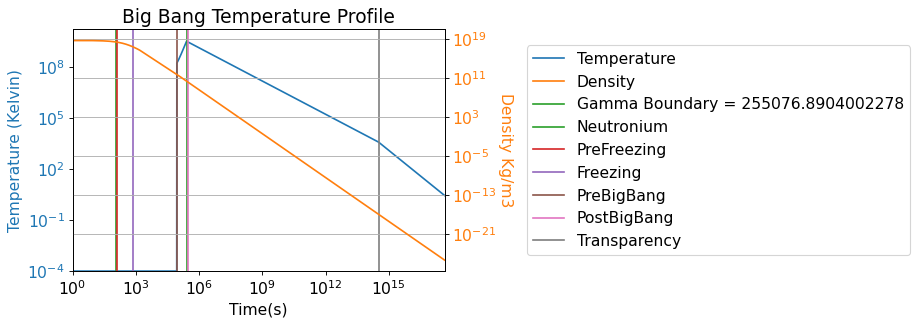

In [10]:
# Plot C

tmin=1E0
tmax=today
dmin = 1E-27
dmax = 1E20

colors = get_standard_colors(num_colors=10)

plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

x_Seq=myU.y_Seq.iloc[1:-1:]
ax=myU.df.plot(x="t", y="Temperature", logx=True, logy=True, legend=False, color=colors[0])
partOfLegend =((x_Seq.t-tmin)*(x_Seq.t-tmax)<=0)
ax.set_xlim(tmin,tmax)
ax.set_ylim(1E-4,1.5E10)
ax.set_title("Big Bang Temperature Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Temperature (Kelvin)", c=colors[0])
ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, legend=False, ax=ax1, color=colors[1])
# ax1.set_ylim(1E-2,None)
ax1.set_ylabel("Density Kg/m3",color=colors[1], rotation=270,labelpad=15)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xnames=[]
xcoords =[]
for x, t, includeit in zip(x_Seq.index, x_Seq.t, partOfLegend):
    if includeit:
        xnames.append(x.replace("density","").replace("At",""))
        xcoords.append(t)
    
# colors for the lines
ax.axvline(label="Density", c=colors[1])
ax.axvline(myU.boundaryadiabatic_t, label="Gamma Boundary = {}".format(myU.boundaryadiabatic_t), c=colors[2])

for xc,c, name in zip(xcoords,colors[2:len(xnames)+2], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

plt.grid(True)
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
plt.savefig(imgAddress + "TemperatureProfileNotLog.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

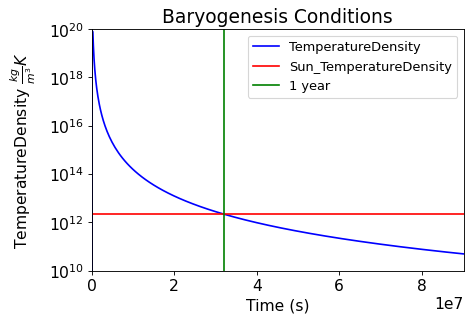

In [11]:
# Plot 7
# myU.df["TemperatureDensity"]= myU.df.Density*myU.df.Temperature
ax = myU.df.plot(x="t", y="TemperatureDensity"  , label="TemperatureDensity", color="b", logx=False, logy=True)
sundensity = 1.5E5 # kg/m^3
suntemperature = 1.5E7 # Kelvin
sunTemperatureDensity = 2.25E+12 # kg/m^3 Kelvin
ax.axhline(sunTemperatureDensity, c="red", label="Sun_TemperatureDensity")
ax.axvline(3.20E7, c="green", label="1 year")
ax.set_ylim(1,None)
ax.set_ylim(1E10,1E20)
ax.set_xlim(0,myU.timePostBigBang*300)
ax.set_xlabel("Time (s)")    
ax.set_title("Baryogenesis Conditions") 
ax.set_ylabel('TemperatureDensity $\\frac{kg}{m^3}K$',color="black", labelpad=10) 
plt.rcParams['legend.fontsize'] = 'small'
# ax.legend= ['TemperatureDensity', "Sun_TemperatureDensity"]
plt.legend()
plt.savefig(imgAddress + "BB_PressureTemperatureLongProfile.png")

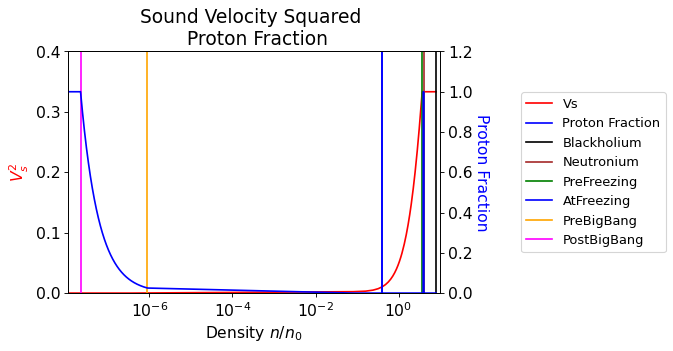

In [12]:
# Plot A

################################
ax=myU.df.plot(x="y",y="Vs", c="r", legend=False)
ax.set_title("Sound Velocity Squared \n Proton Fraction")
ax.set_ylabel("$V_s^2$", c="r")
ax.set_xlabel('Density $n/n_0$')
################################
ax1 = plt.twinx(ax)
myU.df.plot(x="y", y="ProtonFraction", ax=ax1, c="b", legend=False)
ax1.set_ylabel("Proton Fraction", rotation=270, labelpad=15, c="b")
ax.set_ylim(0,np.max(myU.df.Vs)*1.2)
ax1.set_ylim(0,np.max(myU.df.ProtonFraction)*1.2)

ax.axvline(x=myU.densityAtFreezing, label="Proton Fraction", c="blue")
ax.axvline(x=myU.densityBlackholium, label="Blackholium", c="black")
ax.axvline(x=myU.densityNeutronium, label="Neutronium", c="brown")
ax.axvline(x=myU.densityAtPreFreezing, label="PreFreezing", c="green")
ax.axvline(x=myU.densityAtFreezing, label="AtFreezing", c="blue")
ax.axvline(x=myU.densityPreBigBang, label="PreBigBang", c="orange")
ax.axvline(x=myU.densityPostBigBang, label="PostBigBang", c="magenta")

ax.set_xscale('log')
# ax.set_xlim([0.5*densityAtFreezing, 10])
ax.set_xlim([0.5*myU.densityPostBigBang, 10])
# ax.set_xlim([0.5*today_y, 10])
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

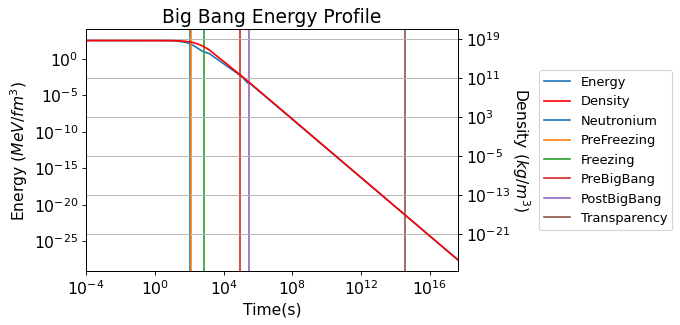

In [13]:
# Plot B

ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,today)
# ax.set_ylim(None,1E6)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")


ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", ax=ax1, color="r",logx=True, logy=True, legend=False)
ax1.set_ylabel("Density ($kg/m^3$)", rotation=270, labelpad=20)
ax.axvline(label="Density", c="r")
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines

for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################


plt.grid(True)
plt.savefig(imgAddress + "EnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Series([], Name: Temperature, dtype: float64)

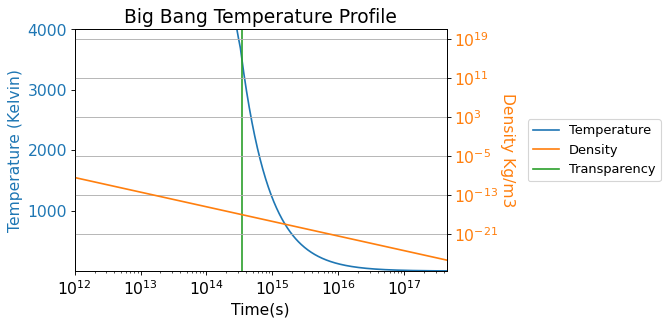

In [14]:
# Plot C1
tmin=1E12
x_Seq=myU.y_Seq.iloc[1:-1:]
ax=myU.df.plot(x="t", y="Temperature", logx=True, logy=False, legend=False, color=colors[0])
partOfLegend =((x_Seq.t-tmin)*(x_Seq.t-tmax)<=0)
ax.set_xlim(tmin,tmax)
ax.set_ylim(1E-4,4000)
ax.set_title("Big Bang Temperature Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Temperature (Kelvin)", c=colors[0])
ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, legend=False, ax=ax1, color=colors[1])
# ax1.set_ylim(1E-2,None)
ax1.set_ylabel("Density Kg/m3",color=colors[1], rotation=270,labelpad=15)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xnames=[]
xcoords =[]
for x, t, includeit in zip(x_Seq.index, x_Seq.t, partOfLegend):
    if includeit:
        xnames.append(x.replace("density","").replace("At",""))
        xcoords.append(t)
    
# colors for the lines
ax.axvline(label="Density", c=colors[1])


for xc,c, name in zip(xcoords,colors[2:len(xnames)+2], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

plt.grid(True)
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
plt.savefig(imgAddress + "TemperatureProfileNotLog.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
myU.df.Temperature[-1:]

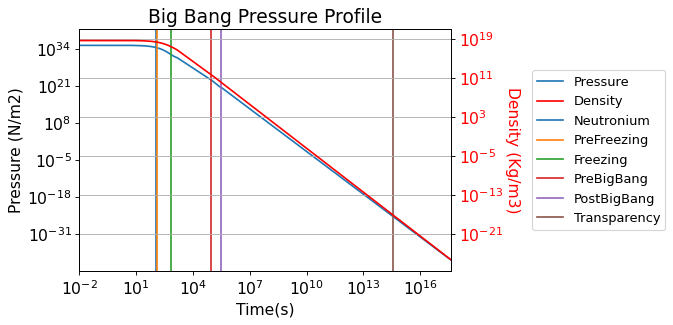

In [15]:
ax=myU.df.plot(x="t", y="Pressure", logx=True, logy=True)
ax.set_xlim(1E-2,today)
ax.set_ylim(None,1E41)
ax.set_title("Big Bang Pressure Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Pressure (N/m2)")
ax1=plt.twinx(ax)


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.20, 0.5))
##########################################################

    
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r", legend=False)

ax1.set_ylabel("Density (Kg/m3)",color="r")

# colors for the lines
ax1.set_ylabel("Density (Kg/m3)", rotation=270,labelpad=15)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
plt.grid(axis='y')
plt.savefig(imgAddress + "PressureProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

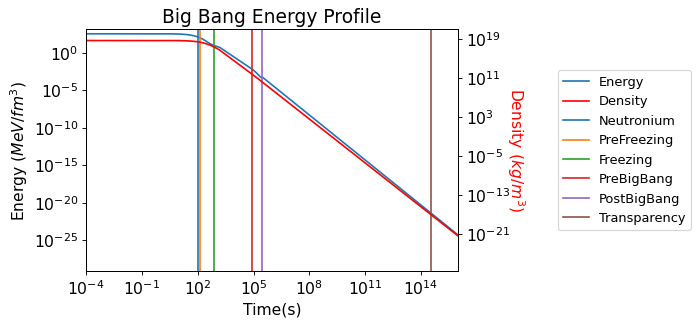

In [16]:
ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,1E16)
ax.set_ylim(None,1.2E3)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r",legend=False)

# colors for the lines
ax1.set_ylabel("Density ($kg/m^3$)", color="r", rotation=270,labelpad=15)
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
##########################################################


plt.savefig(imgAddress + "UniverseEnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

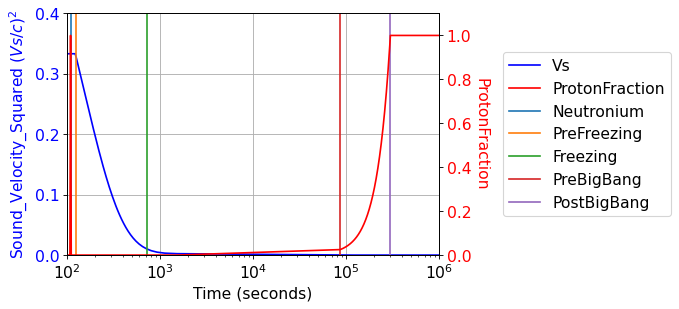

In [17]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "Vs",logx=True, color="b", legend=False)

ax.set_xlim(1E2,1E6)
ax.set_ylim(0,0.4)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Sound_Velocity_Squared $(Vs/c)^2$", c="blue")
ax.grid(True)



##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="ProtonFraction", c="r")
for xc,c, name in zip(xcoords[0:5],colors[0:5], xnames[0:5]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
##########################################################



ax2=plt.twinx(ax)    
myU.df.plot(x="t", y="ProtonFraction", ax=ax2,logx=True, color="r", legend=False)
ax2.set_ylim(0,1.1)
ax2.set_ylabel("ProtonFraction",color="r", rotation=270, labelpad=15)
ax2.set_xlim(1E2,1E6)

for tl in ax.get_yticklabels():
    tl.set_color('blue')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig(imgAddress + "NeutroniumSpeedOfSoundVersusDecay.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


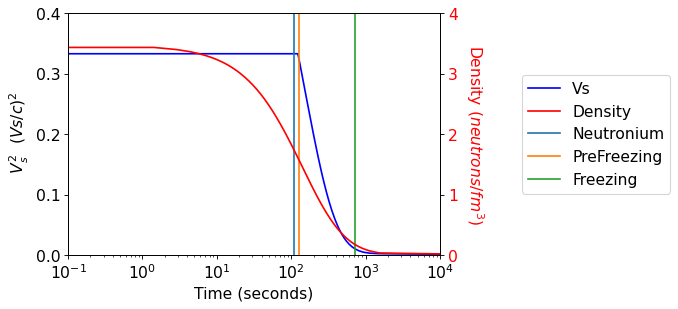

In [18]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "Vs",logx=True, color="b")

ax.set_xlim(1E0,1E4)
ax.set_ylim(0,0.4)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel(" $V_s^2$  $(Vs/c)^2$")
ax.legend(loc="center")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords[0:3],colors[0:3], xnames[0:3]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

ax2=plt.twinx(ax)    
myU.df["n*n0"]= [(x*n0).to("1/fm**3").value for x in myU.df.y]
myU.df.plot(x="t", y="n*n0", ax=ax2,logx=True,logy=False, color="r", legend=False)
ax2.set_ylim(0,4)
ax2.set_ylabel("Density ($neutrons/fm^3$)",color="r", rotation=270, labelpad=25)
ax2.set_xlim(1E-1,1E4)

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig(imgAddress + "NeutroniumSpeedOfSound.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

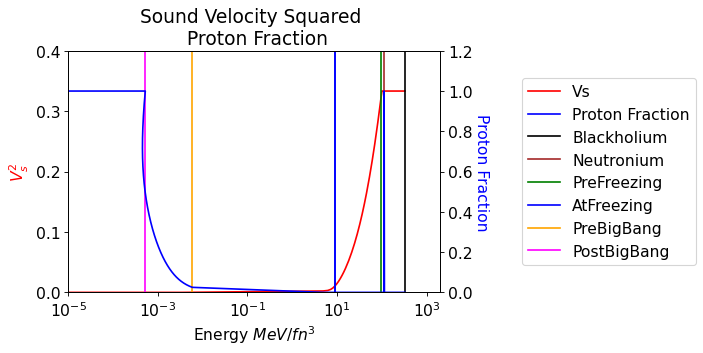

In [19]:
ax=myU.df.plot(x="Energy",y="Vs", c="r", legend=False)
ax.set_title("Sound Velocity Squared \n Proton Fraction")
ax.set_ylabel("$V_s^2$", c="r")
ax.set_xlabel('Energy $MeV/fn^3$')
################################
ax1 = plt.twinx(ax)
myU.df.plot(x="Energy", y="ProtonFraction", ax=ax1, c="b", legend=False)
ax1.set_ylabel("Proton Fraction", rotation=270, labelpad=15, c="b")
ax.set_ylim(0,np.max(myU.df.Vs)*1.2)
ax1.set_ylim(0,np.max(myU.df.ProtonFraction)*1.2)

ax.axvline(x=myU.y_Seq.loc["densityAtFreezing", "Energy"], label="Proton Fraction", c="blue")
ax.axvline(x=myU.y_Seq.loc["densityBlackholium","Energy"], label="Blackholium", c="black")
ax.axvline(x=myU.y_Seq.loc["densityNeutronium","Energy"], label="Neutronium", c="brown")
ax.axvline(x=myU.y_Seq.loc["densityAtPreFreezing","Energy"], label="PreFreezing", c="green")
ax.axvline(x=myU.y_Seq.loc["densityAtFreezing","Energy"], label="AtFreezing", c="blue")
ax.axvline(x=myU.y_Seq.loc["densityPreBigBang","Energy"], label="PreBigBang", c="orange")
ax.axvline(x=myU.y_Seq.loc["densityPostBigBang","Energy"], label="PostBigBang", c="magenta")

ax.set_xscale('log')
ax.set_xlim([1E-5, 2E3])
# ax.set_xlim([0.5*densityAtFreezing, 10])
# ax.set_xlim([0.5*densityPostBigBang, 10])
# ax.set_xlim([0.5*today_y, 10])
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

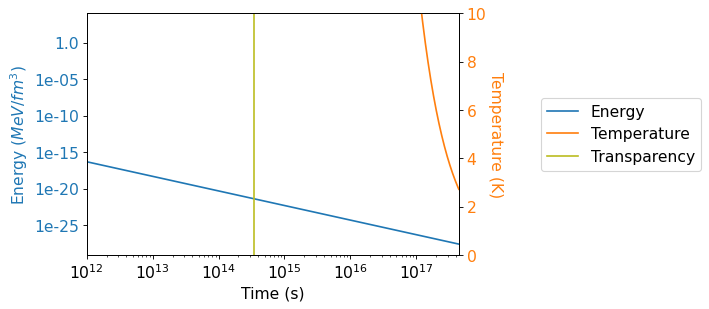

In [20]:
# Plot 6

import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

ax=myU.df.plot(x="t", y="Energy", color=colors[0], logx=True, logy=True, legend=False)
ax.set_xlim(tmin,today)
# ax.set_ylim(1E-4, 1E5)

ax.set_xlabel("Time (s)")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[0:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
# ax.axvline(label="Energy", c=colors[0])
# ax.axvline(label="Temperature", c=colors[1])


fmt = lambda x, pos: '{}'.format(x, pos)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Temperature", ax=ax1, color=colors[1],logx=True, logy=False, legend=False)
# ax1.set_xlim(1E2,1E5)
ax1.set_ylim(0,10)
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
ax.set_ylabel("Energy ($MeV/fm^3$)", color=colors[0],)
ax1.set_ylabel("Temperature (K)", color=colors[1], rotation=270,labelpad=15)
ax.axvline(label="Temperature", c=colors[1])
for xc,c, name in zip(xcoords,colors[2:], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)

lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################
plt.savefig(imgAddress + "EnergyTemperature.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


/tmp/ipykernel_56690/1745983407.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,1200)


Series([], Name: Temperature, dtype: float64)

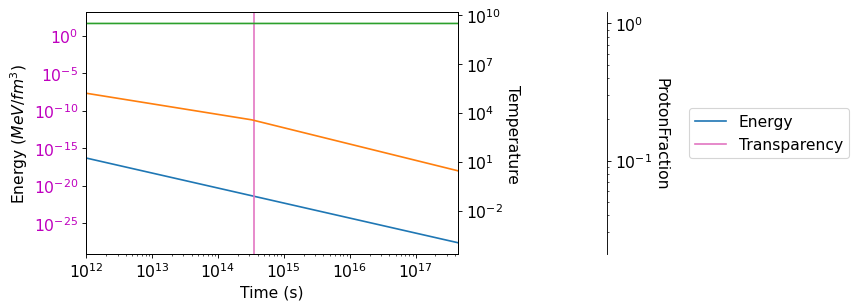

In [21]:
# Plot 6
spacing=.4
cols=['Energy','Temperature', 'ProtonFraction']
data =myU.df.copy()
data.index = data.t
# ax = plot_multi( myU.df,cols=['Temperature', 'Energy','Proton_Fraction'], spacing=.3)



# First axis
ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0],logx=True, logy=True )
ax.set_ylabel(ylabel=cols[0])
ax.set_ylim(0,1200)
ax.set_xlim(tmin,today)
lines, labels = ax.get_legend_handles_labels()


for xc,c, name in zip(xcoords,colors, xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)



for n in range(1, len(cols)):
    # Multiple y-axes
    ax_new = ax.twinx()
    ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
    data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], logx=True, logy=True)
    ax_new.set_ylabel(ylabel=cols[n], rotation=270, labelpad=15)

    # Proper legend position
    line, label = ax_new.get_legend_handles_labels()
    lines += line
    labels += label

ax.set_ylabel("Energy ($MeV/fm^3$)")
ax.set_xlabel("Time (s)")    
    
# ax.legend(lines, labels, loc=4)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.6, 0.5))

for tl in ax.get_yticklabels():
    tl.set_color('m')
    
myU.df.Temperature[-1:]

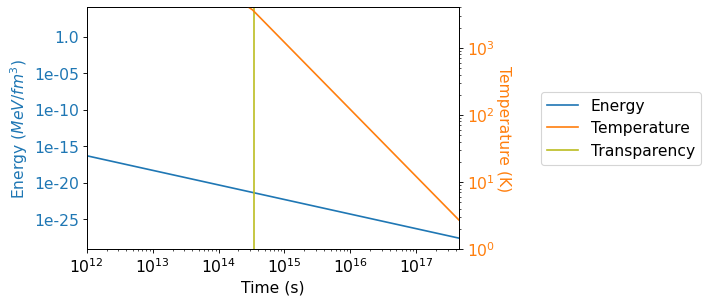

In [22]:
# Plot 6

import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

ax=myU.df.plot(x="t", y="Energy", color=colors[0], logx=True, logy=True, legend=False)
ax.set_xlim(tmin,today)
# ax.set_ylim(1E-4, 1E5)

ax.set_xlabel("Time (s)")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[0:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
# ax.axvline(label="Energy", c=colors[0])
# ax.axvline(label="Temperature", c=colors[1])


fmt = lambda x, pos: '{}'.format(x, pos)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Temperature", ax=ax1, color=colors[1],logx=True, logy=True, legend=False)
# ax1.set_xlim(1E2,1E5)
ax1.set_ylim(1E0,4000)
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
ax.set_ylabel("Energy ($MeV/fm^3$)", color=colors[0],)
ax1.set_ylabel("Temperature (K)", color=colors[1], rotation=270,labelpad=15)
ax.axvline(label="Temperature", c=colors[1])
for xc,c, name in zip(xcoords,colors[2:], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)

lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################
plt.savefig(imgAddress + "EnergyTemperature.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


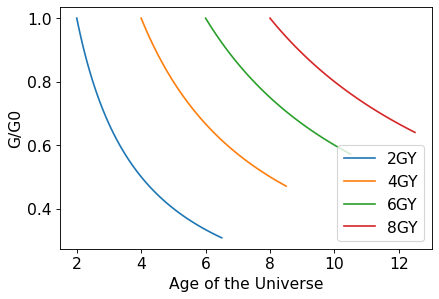

In [23]:
# Plot D

fig, ax = plt.subplots()
for initialT in range(2,10,2):
    t=np.linspace(initialT, initialT+4.5,100)
    GG=initialT/t
    ax.plot(t,GG,label=str(initialT) + "GY")
    ax.legend()
    ax.set_ylabel("G/G0")
    ax.set_xlabel("Age of the Universe")
plt.savefig(imgAddress + "G_Decay.png", dpi=300)

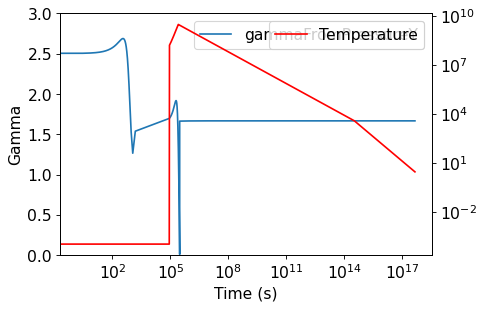

<Figure size 480x320 with 0 Axes>

In [24]:
# Plot E  gamma = dLog(Pressure)/dlog(y)

fig, ax = plt.subplots()
myU.df.plot(x="t", y= "gammaFromPressureY", ax=ax,ylim=[0,3], logx=True, logy=False)
ax1=plt.twinx(ax)
myU.df.plot(x="t", y= "Temperature", color="red", ax=ax1,ylim=[None,None], logx=True, logy=True)
ax.legend()
ax.set_ylabel("Gamma")
ax.set_xlabel("Time (s)")
plt.show()
plt.savefig(imgAddress + "gammaFromPressureY.png", dpi=300)